### Black Mathematicians have made significant contributions to American life.###
This notebook creates a dataset that tells their stories through a lens of data analysis.

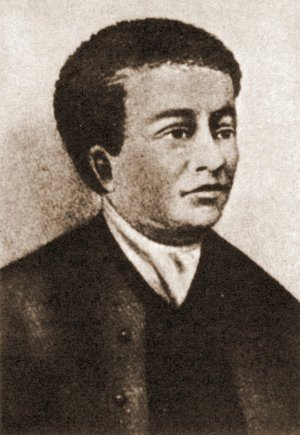

In [7]:
from IPython.display import Image
Image("Banneker.jpg")
# Benjamin Banneker

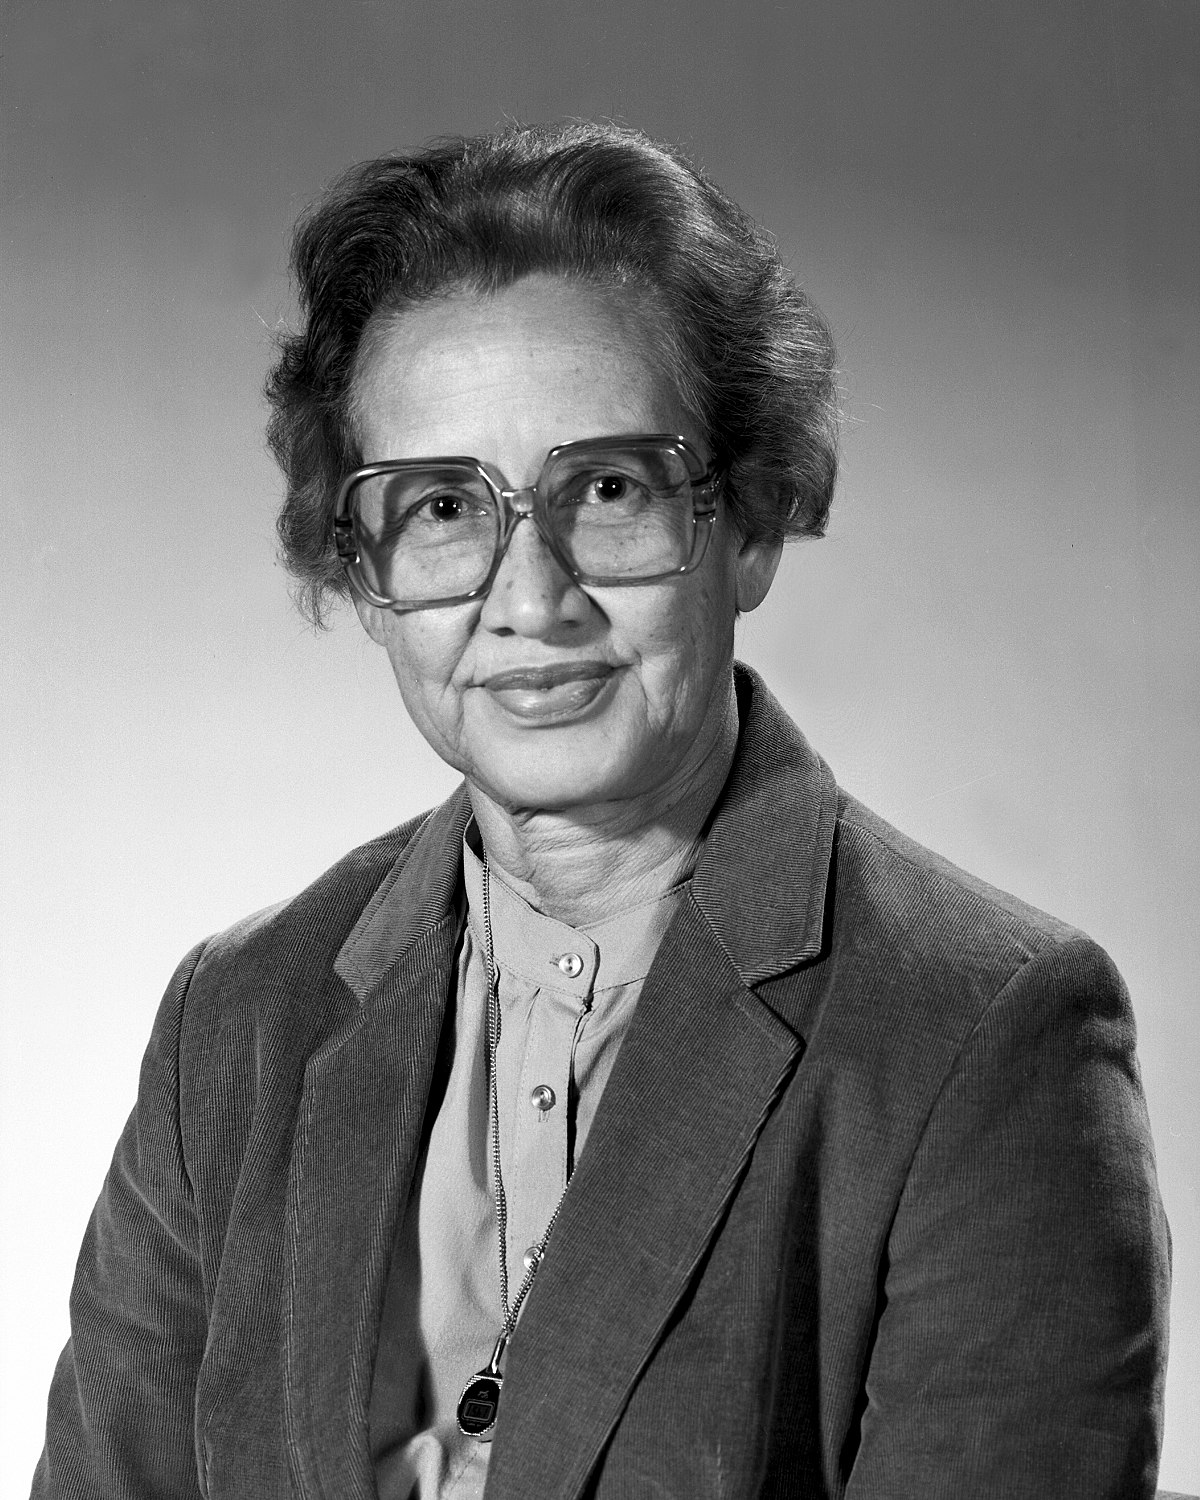

In [8]:
from IPython.display import Image
Image("KatherineJ.jpg")
# Benjamin Banneker

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import requests
from bs4 import BeautifulSoup as bs

print("Pandas Version", pd.__version__)

In [4]:
#Requests
r = requests.get("https://en.wikipedia.org/wiki/List_of_African-American_mathematicians")

#Convert to bs object
soup = bs(r.content)

In [5]:
soup.title.text

'List of African-American mathematicians - Wikipedia'

In [6]:
#Scraping the first table of Math Phds
table = soup.find_all("table", attrs = {'class': 'wikitable'})[2]
phd = pd.read_html(str(table))[0]
phd['Degree'] = 'Phd'
phd.head()

,Year,Gender,Name,Awarded by,Dissertation title,Ref.,Degree
0,1925,(M),Elbert Frank Cox,Cornell University,The polynomial solutions of the difference equ...,[39],Phd
1,1928,(M),Dudley Weldon Woodard,University of Pennsylvania,On two-dimensional analysis situs with special...,[40],Phd
2,1933,(M),William Schieffelin Claytor,University of Pennsylvania,Topological immersion of peanian continua in a...,[41][42],Phd
3,1934,(M),Walter Richard Talbot,University of Pittsburgh,Fundamental regions in S6 for the simple quate...,[43],Phd
4,1938,(M),Reubin Roosevelt McDaniel,Cornell University,Approximation to algebraic numbers by means of...,[44],Phd


In [7]:
#Find those with degrees in Math Education
table = soup.find_all("table", attrs = {'class': 'wikitable'})[4]
math_ed = pd.read_html(str(table))[0]
math_ed['Degree'] = 'Math Ed'
math_ed.head()

,Year,Gender,Name,Awarded by,Dissertation title,Ref.,Degree
0,1942,(M),Socrates Walter Saunders,University of Pittsburgh,Legal aspects of the education of Negroes with...,[163],Math Ed
1,1947,(F),Ethel M. Turner,Columbia University,Consumer mathematics in adult education,[164],Math Ed
2,1950,(M),Caldwell Elwood Boulware,Columbia University,The emerging concept of mental arithmetic,[165],Math Ed
3,1951,(M),Theodore A Love,New York University,The relation of achievement in mathematics to ...,[166],Math Ed
4,1954,(F),Angie Turner King,University of Pittsburgh,An analysis of early algebra textbooks used in...,[167],Math Ed


In [8]:
#Reporting out findings
print(f'There were {len(phd)} African_Americans who earned their Phds in Mathematics between 1925 to 1975.')
print(f'There were {len(math_ed)} African_Americans who earned their Phds in Mathematics Education between 1925 to 1975.')

There were 117 African_Americans who earned their Phds in Mathematics between 1925 to 1975.
There were 38 African_Americans who earned their Phds in Mathematics Education between 1925 to 1975.


In [9]:
#Concatenating the two dataframes
df = pd.concat([phd, math_ed])

# df = df.drop(columns = ['Ref.'])
df.head()
df.to_csv("African_American_Mathematicians.csv")

In [10]:
#Checking to see the 
#Socrates Walter Saunders earned 2 Math Phds; one in 1942 and in 1962
df['Name'].value_counts().head(5)

Socrates Walter Saunders    2
Elbert Frank Cox            1
Wendell Primus Jones        1
Ethel M. Turner             1
Lonnie Williams Keith       1
Name: Name, dtype: int64

In [11]:
#How many were Math Education degrees vs. PhDs
df['Degree'].value_counts()

Phd        117
Math Ed     38
Name: Degree, dtype: int64

In [14]:
#Doctoral degree by gender
df.groupby(['Gender'])['Degree'].count()

Gender
(F)     30
(M)    125
Name: Degree, dtype: int64

In [19]:
#What were the universities who awarded the most degrees to AA mathematicians
most_common_univ = df['Awarded by'].value_counts().head(20)
most_common_univ

10

The analysis below only includes Advanced degrees and is not meant to ignore the important & fundamental work done by HBCU's; where an overwhelming number of people on this list received their undergrad training.

In [26]:
#Which universities awarded the most degrees to Black Mathematicians
for i, j in zip(most_common_univ.index, most_common_univ):
    if j == 1:
        print(f"{i} awarded {j} advanced degrees to Black Mathematicians.\n")
    else:
        print(f"{i} awarded {j} advanced degrees to Black Mathematicians.\n")

Oklahoma State University awarded 10 advanced degrees to Black Mathematicians.

University of Michigan awarded 10 advanced degrees to Black Mathematicians.

University of Illinois awarded 9 advanced degrees to Black Mathematicians.

University of Pittsburgh awarded 7 advanced degrees to Black Mathematicians.

Cornell University awarded 6 advanced degrees to Black Mathematicians.

University of Chicago awarded 6 advanced degrees to Black Mathematicians.

Ohio State University awarded 6 advanced degrees to Black Mathematicians.

University of California, Berkeley awarded 6 advanced degrees to Black Mathematicians.

University of Pennsylvania awarded 5 advanced degrees to Black Mathematicians.

Pennsylvania State University awarded 5 advanced degrees to Black Mathematicians.

University of Texas awarded 5 advanced degrees to Black Mathematicians.

Columbia University awarded 5 advanced degrees to Black Mathematicians.

Purdue University awarded 5 advanced degrees to Black Mathematicians.
